In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Npoints = 1000
tmin = 0
tmax = 30
dt = 0.01
Fs = 1 / dt

points = np.linspace(tmin, tmax, Npoints)
spectrum_length = Npoints // 2

In [3]:
harmonic_01 = 3.0 * np.sin(1.0 * points)
harmonic_02 = 0.8 * np.sin(8.0 * points)
harmonic_03 = 2.5 * np.sin(2.5 * points)
signal_mix_01 = harmonic_01 + harmonic_02
signal_mix_02 = harmonic_02 + harmonic_03

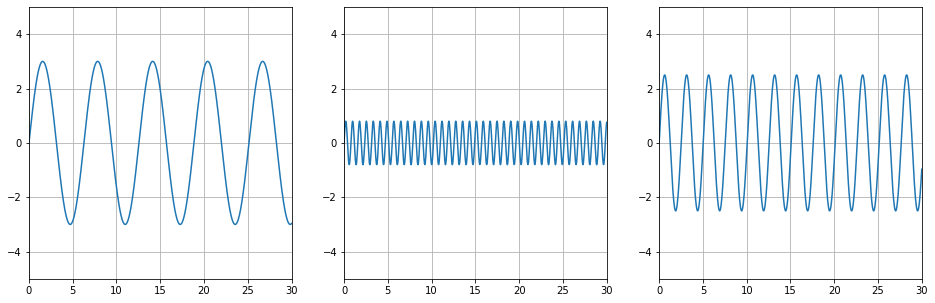

In [4]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(131)
plt.plot(points, harmonic_01)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(132)
plt.plot(points, harmonic_02)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(133)
plt.plot(points, harmonic_03)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)

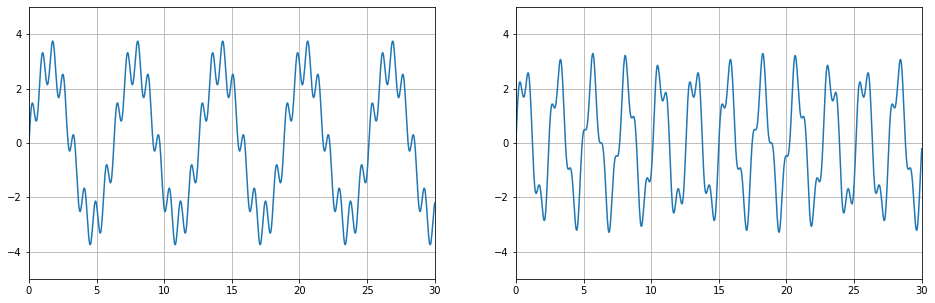

In [5]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(121)
plt.plot(points, signal_mix_01)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(122)
plt.plot(points, signal_mix_02)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)

In [6]:
spectra_mix_1 = np.fft.fft(signal_mix_01)[0:spectrum_length]
spectra_mix_2 = np.fft.fft(signal_mix_02)[0:spectrum_length]

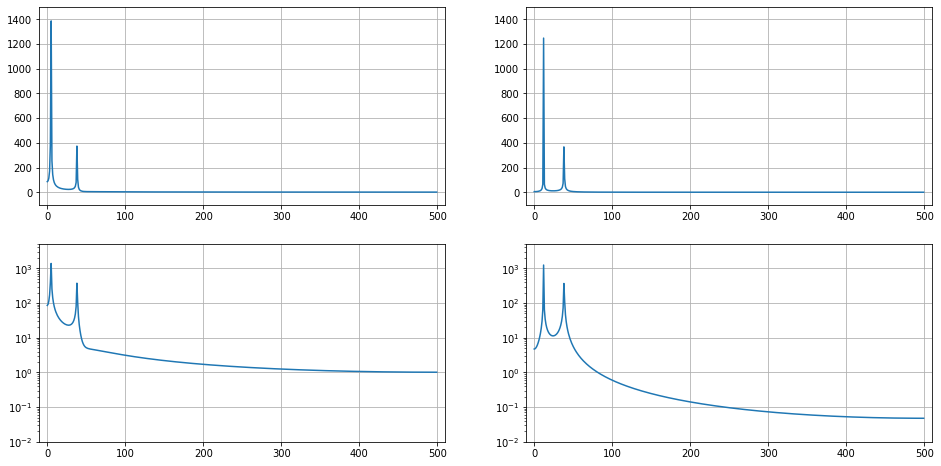

In [37]:

plt.figure(1, figsize = [16, 8], facecolor = 'white')
plt.subplot(221)
plt.plot(np.abs(spectra_mix_1))
plt.axis([-10, 510, -100, 1500])
plt.grid(True)
plt.subplot(222)
plt.plot(np.abs(spectra_mix_2))
plt.axis([-10, 510, -100, 1500])
plt.grid(True)


plt.subplot(223)
plt.plot(np.abs(spectra_mix_1))
plt.axis([-10, 510, 0.01, 5000])
plt.yscale('log')
plt.grid(True)
plt.subplot(224)
plt.plot(np.abs(spectra_mix_2))
plt.axis([-10, 510, 0.01, 5000])
plt.yscale('log')
plt.grid(True)
plt.show()

In [8]:
mean = 0
std = 1 
noise_01 = np.random.normal(mean, std, len(points))
noise_02 = np.random.normal(mean, std, len(points))
noise_spectrum_01 = np.fft.fft(noise_01)[0:spectrum_length]
noise_spectrum_02 = np.fft.fft(noise_02)[0:spectrum_length]

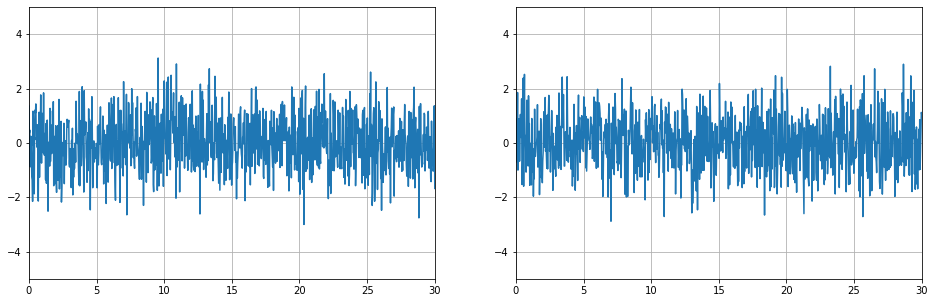

In [39]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(121)
plt.plot(points, noise_01)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(122)
plt.plot(points, noise_02)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)

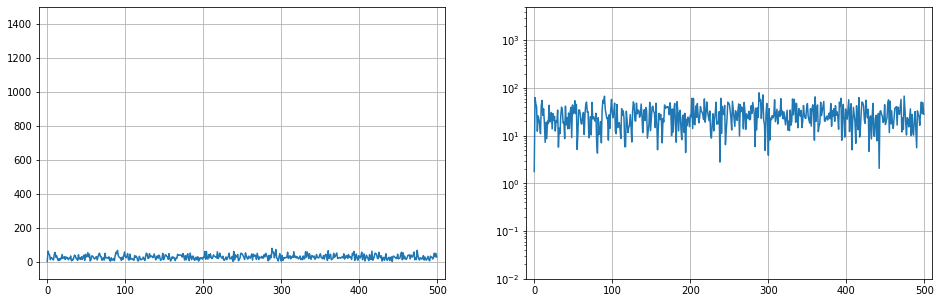

In [31]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(121)
plt.plot(np.abs(noise_spectrum_01))
plt.axis([-10, 510, -100, 1500])
plt.grid(True)
plt.subplot(122)
plt.plot(np.abs(noise_spectrum_01))
plt.axis([-10, 510, 0.01, 5000])
plt.yscale('log')
plt.grid(True)

In [10]:
noise_mix_01 = signal_mix_01 + 5.0 * noise_01
noise_mix_02 = signal_mix_02 + 1.0 * noise_02

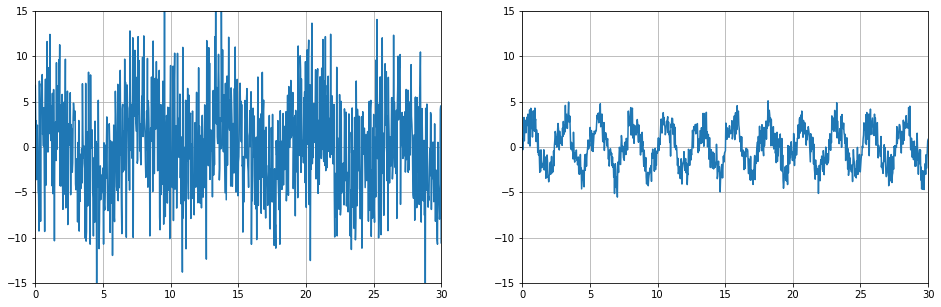

In [11]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(121)
plt.plot(points, noise_mix_01)
plt.axis([tmin, tmax, -15, 15])
plt.grid(True)
plt.subplot(122)
plt.plot(points, noise_mix_02)
plt.axis([tmin, tmax, -15, 15])
plt.grid(True)

In [12]:
spectra_nmix_1 = np.fft.fft(noise_mix_01)[0:spectrum_length]
spectra_nmix_2 = np.fft.fft(noise_mix_02)[0:spectrum_length]

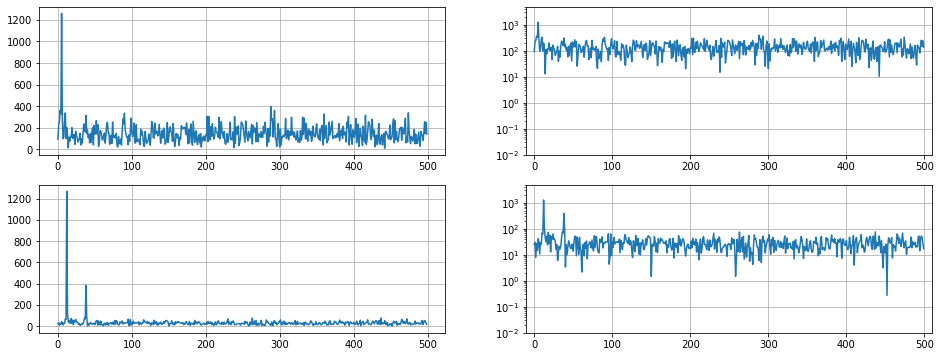

In [32]:
plt.figure(1, figsize = [16, 6], facecolor = 'white')
plt.subplot(221)
plt.plot(np.abs(spectra_nmix_1))
# plt.axis([-2, 52, -0.1, 1.65])
plt.grid(True)
plt.subplot(222)
plt.plot(np.abs(spectra_nmix_1))
plt.axis([-10, 510, 0.01, 5000])
plt.yscale('log')
plt.grid(True)

plt.subplot(223)
plt.plot(np.abs(spectra_nmix_2))
# plt.axis([-2, 52, -0.1, 1.65])
plt.grid(True)
plt.subplot(224)
plt.plot(np.abs(spectra_nmix_2))
plt.axis([-10, 510, 0.01, 5000])
plt.yscale('log')
plt.grid(True)

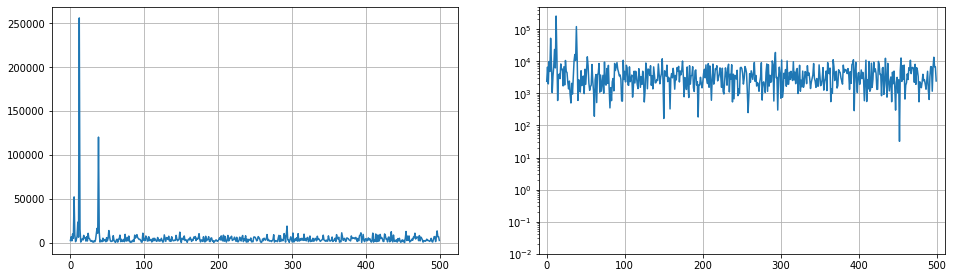

In [35]:
cross_spectra = spectra_nmix_1 * np.conj(spectra_nmix_2)

plt.figure(1, figsize = [16,10], facecolor = 'white')
plt.subplot(221)
plt.plot(np.abs(cross_spectra))
# plt.axis([-2, 52, -0.1, 1.65])
plt.grid(True)
plt.subplot(222)
plt.plot(np.abs(cross_spectra))
plt.axis([-10, 510, 0.01, 500000])
plt.yscale('log')
plt.grid(True)
plt.show()

## Let's explore noise!

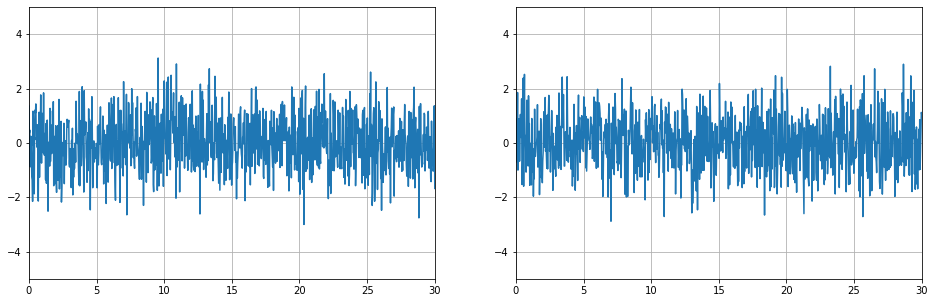

In [40]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(121)
plt.plot(points, noise_01)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(122)
plt.plot(points, noise_02)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)

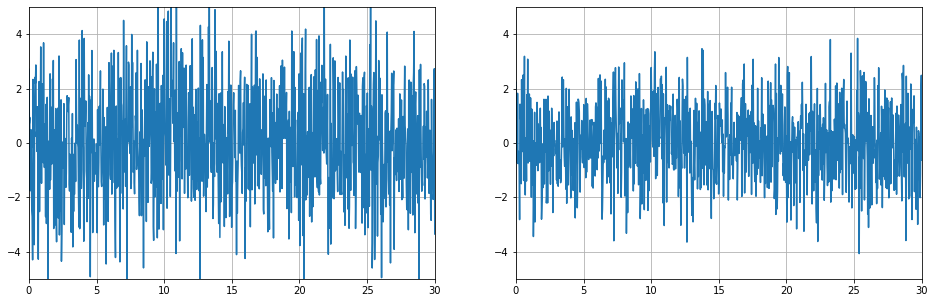

In [41]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(121)
plt.plot(points, 2*noise_01)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(122)
plt.plot(points, noise_01 + noise_02)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)

In [44]:
n_1 = 1
n_2 = 5
n_3 = 10
n_4 = 20

sum_1 = np.zeros(len(points))
sum_2 = np.zeros(len(points))
sum_3 = np.zeros(len(points))
sum_4 = np.zeros(len(points))

for i in range (n_1):
    noise = np.random.normal(mean, std, len(points))
    sum_1 = sum_1 + noise
sum_1 = sum_1 / n_1

for i in range (n_2):
    noise = np.random.normal(mean, std, len(points))
    sum_2 = sum_2 + noise
sum_2 = sum_2 / n_2

for i in range (n_3):
    noise = np.random.normal(mean, std, len(points))
    sum_3 = sum_3 + noise
sum_3 = sum_3 / n_3

for i in range (n_4):
    noise = np.random.normal(mean, std, len(points))
    sum_4 = sum_4 + noise
sum_4 = sum_4 / n_4

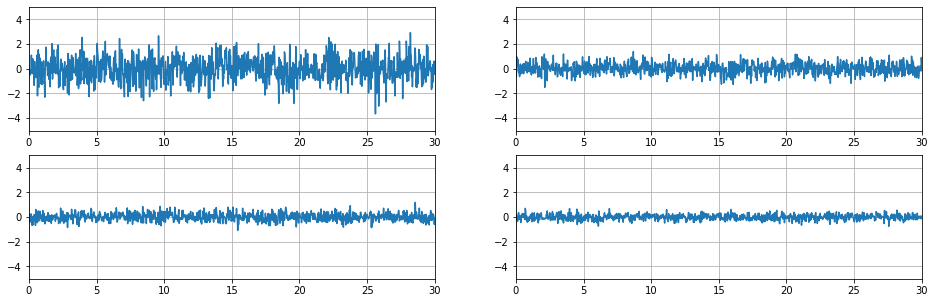

In [45]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(221)
plt.plot(points, sum_1)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(222)
plt.plot(points, sum_2)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(223)
plt.plot(points, sum_3)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(224)
plt.plot(points, sum_4)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)

In [46]:
n_1 = 1
n_2 = 5
n_3 = 10
n_4 = 20

sum_1 = np.zeros(len(points))
sum_2 = np.zeros(len(points))
sum_3 = np.zeros(len(points))
sum_4 = np.zeros(len(points))

noise = np.random.normal(mean, std, len(points))

for i in range (n_1):
    sum_1 = sum_1 + noise
sum_1 = sum_1 / n_1

for i in range (n_2):
    sum_2 = sum_2 + noise
sum_2 = sum_2 / n_2

for i in range (n_3):
    sum_3 = sum_3 + noise
sum_3 = sum_3 / n_3

for i in range (n_4):
    sum_4 = sum_4 + noise
sum_4 = sum_4 / n_4

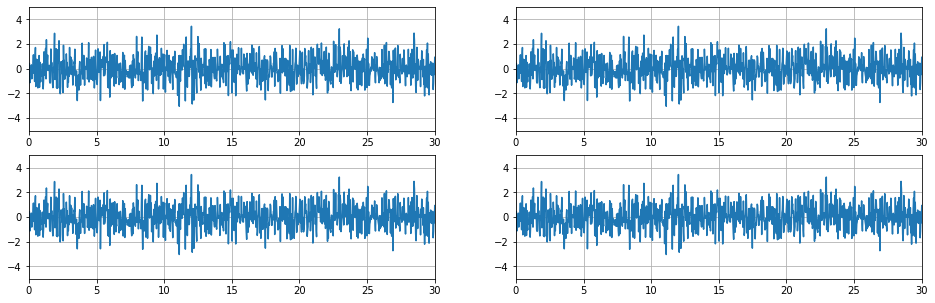

In [47]:
fig = plt.figure(facecolor = 'white', figsize = (16, 5))
plt.subplot(221)
plt.plot(points, sum_1)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(222)
plt.plot(points, sum_2)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(223)
plt.plot(points, sum_3)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)
plt.subplot(224)
plt.plot(points, sum_4)
plt.axis([tmin, tmax, -5, 5])
plt.grid(True)